<a href="https://colab.research.google.com/github/harvydavies/LCO-code/blob/main/Condensed_matterCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

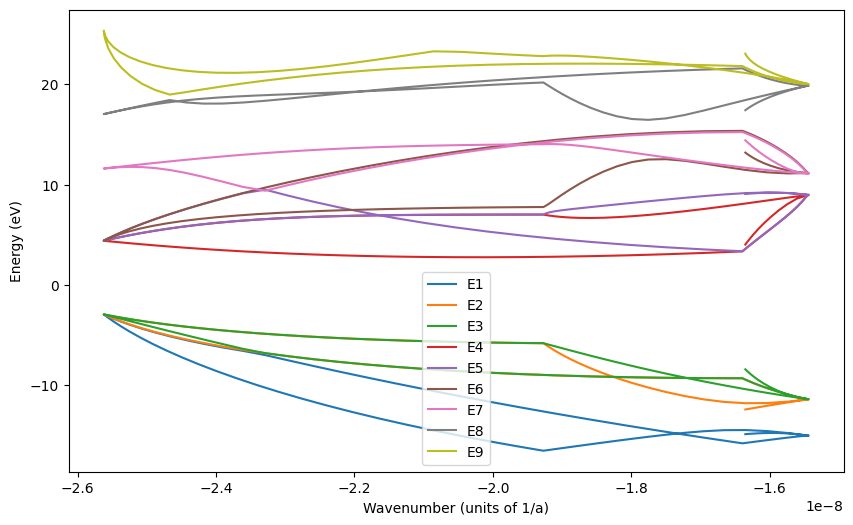

In [21]:
data = np.loadtxt('/content/Diamond_band_structure.txt')

# Assuming columns for V magnitude, B magnitude, and log age are at indices 31, 32, and 2 respectively
k_coord = data[:, 1]
L = (2*np.pi)/k_coord
e1 = data[:,2]
e2 = data[:,3]
e3 = data[:,4]
e4 = data[:,5]
e5 = data[:,6]
e6 = data[:,7]
e7 = data[:,8]
e8 = data[:,9]
e9 = data[:,10]
#e10 = data[:,11]

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(k_coord, e1, label='E1')
plt.plot(k_coord, e2, label='E2')
plt.plot(k_coord, e3, label='E3')
plt.plot(k_coord, e4, label='E4')
plt.plot(k_coord, e5, label='E5')
plt.plot(k_coord, e6, label='E6')
plt.plot(k_coord, e7, label='E7')
plt.plot(k_coord, e8, label='E8')
plt.plot(k_coord, e9, label='E9')


plt.xlabel('Wavenumber (units of 1/a)')
plt.ylabel('Energy (eV)')
plt.title('')
plt.legend()
#plt.ylim(-16,16)
#plt.xlim(0,22)
plt.grid(False)
plt.show()

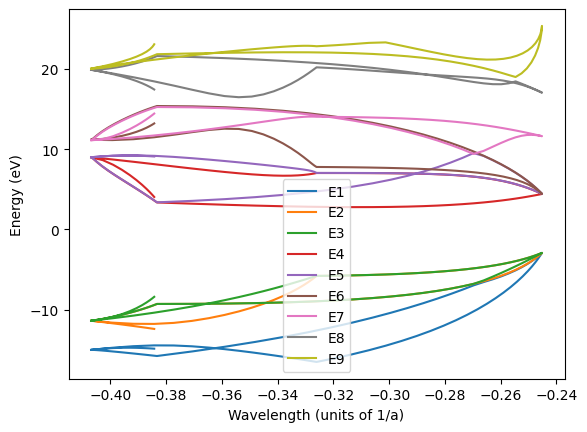

In [19]:
plt.plot(L, e1, label='E1')
plt.plot(L, e2, label='E2')
plt.plot(L, e3, label='E3')
plt.plot(L, e4, label='E4')
plt.plot(L, e5, label='E5')
plt.plot(L, e6, label='E6')
plt.plot(L, e7, label='E7')
plt.plot(L, e8, label='E8')
plt.plot(L, e9, label='E9')


plt.xlabel('Wavelength (units of 1/a)')
plt.ylabel('Energy (eV)')
plt.title('')
plt.legend()
#plt.ylim(-16,16)
#plt.xlim(0,22)
plt.grid(False)
plt.show()

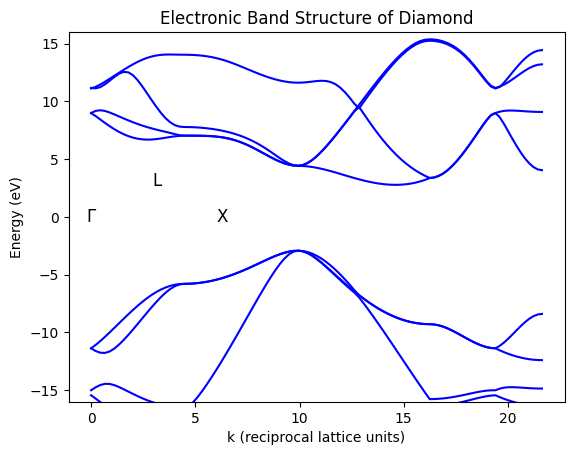

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("Diamond_band_structure.txt")

# Extract k-coordinate and energies
k = data[:, 0]  # k-coordinate in units of 1/a
energies = data[:, 1:]  # Energies in units of eV

# Define lattice constant
a = 3.57  # Å

# Convert k-coordinate to reciprocal lattice units (2*pi/a)
k_rlu = k * (2 * np.pi / a)

# Plot band structure
for energy_curve in energies.T:
    plt.plot(k_rlu*0.571428, energy_curve, color='b')

# Add high-symmetry points Γ, X, and L
plt.text(0, 0, 'Γ', fontsize=12, ha='center', va='center')
plt.text(2 * np.pi, 0, 'X', fontsize=12, ha='center', va='center')
plt.text(np.pi, np.pi, 'L', fontsize=12, ha='center', va='center')

# Add labels and title
plt.xlabel('k (reciprocal lattice units)')
plt.ylabel('Energy (eV)')
plt.title('Electronic Band Structure of Diamond')

plt.ylim(-16,16)
#plt.xlim(0,22)

# Show plot
plt.show()


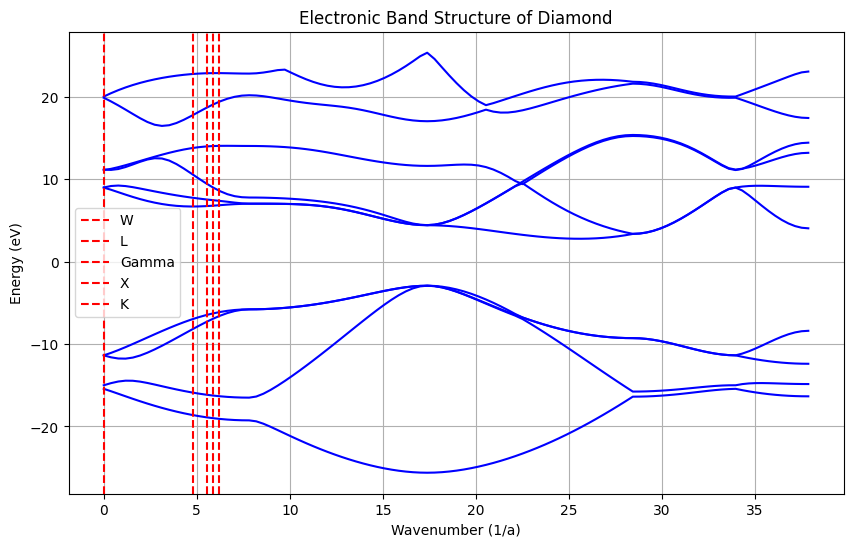

Sum of k-vectors along the specified path: 18.946796099573355


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("Diamond_band_structure.txt")

# Define lattice constant
a = 3.57  # Å

# Extract k-coordinate and energies
k = data[:, 0]  # k-coordinate in units of 1/a
energies = data[:, 1:]  # Energies in units of eV

# Convert k-coordinate to wavenumber
k_wavenumber = (2 * np.pi / a) * k

# Plot dispersion curves
plt.figure(figsize=(10, 6))
for energy in energies.T:
    plt.plot(k_wavenumber, energy, color='blue')

# Define points in k-space
k_points = {
    'W': np.pi/a * np.array([(np.pi), (2*np.pi), 0]),
    'L': np.pi/a * np.array([(np.pi), (np.pi), (np.pi)]),
    'Gamma': np.array([0, 0, 0]),
    'X': np.pi/a * np.array([0, (2*np.pi), 0]),
    'K': np.pi/a * np.array([(1.5*np.pi), (1.5*np.pi), 0])
}

# Plot vertical lines for each point
for point, k_value in k_points.items():
    plt.axvline(np.linalg.norm(k_value), linestyle='--', color='red', label=point)

plt.xlabel('Wavenumber (1/a)')
plt.ylabel('Energy (eV)')
plt.title('Electronic Band Structure of Diamond')
plt.legend()
plt.grid(True)
plt.show()

# Calculate magnitudes of k-vectors for the specified path
WL = np.linalg.norm(k_points['L'] - k_points['W'])
LG = np.linalg.norm(k_points['Gamma'] - k_points['L'])
GX = np.linalg.norm(k_points['X'] - k_points['Gamma'])
XW = np.linalg.norm(k_points['W'] - k_points['X'])
WK = np.linalg.norm(k_points['K'] - k_points['W'])

# Verify sum
sum_of_k_vectors = WL + LG + GX + XW + WK
print("Sum of k-vectors along the specified path:", sum_of_k_vectors)
